# Data Description
Customer churn is when a company’s customers stop doing business with that company.
Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer.
New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers.
Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products.
But the most effective way for a company to prevent attrition of customers is to truly know them.
The vast volumes of data collected about customers can be used to build churn prediction models
Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector,
as the barriers to entry for switching services are so low. 

Task is to examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing required libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
import seaborn as sns

# Loading the dataset

In [28]:
df=pd.read_csv('telecom_churn.csv')

In [29]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [30]:
df.shape

(7043, 21)

# checking the null values

In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values

# Checking the datatypes of the columns

In [32]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Almost all the columns have object datatype, we will need to convert this.

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can observe that TotalCharges have continous data but datatype is object.Let us handle this column

In [34]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [35]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [36]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [37]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now if you see, there are 11 null values in Total Charges

In [38]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [39]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [40]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Dividing the dataframe into Cateogrical and numeric for data visualization

In [41]:
df_cat = df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                               'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
             'Contract','PaperlessBilling','PaymentMethod','Churn'
                               ]].copy()

In [42]:
df_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Visualization of the data

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

Male      3555
Female    3488
Name: gender, dtype: int64


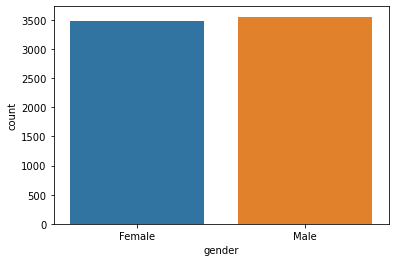

In [43]:
sns.countplot(df_cat['gender'])
print(df_cat['gender'].value_counts())

From the above observations, we have 3555 male and 3488 female

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


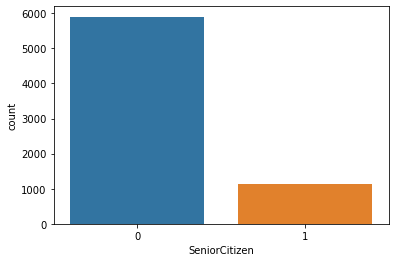

In [44]:
sns.countplot(df_cat['SeniorCitizen'])
print(df_cat['SeniorCitizen'].value_counts())

From this, we can see that there are 1142 senior citizens and 5901 young customers

No     4933
Yes    2110
Name: Dependents, dtype: int64


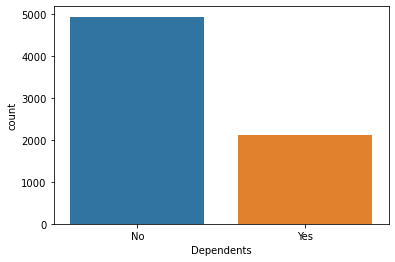

In [45]:
sns.countplot(df_cat['Dependents'])
print(df_cat['Dependents'].value_counts())

From this, we can see that there 2110 dependent customers and 4933 independent customers

No     3641
Yes    3402
Name: Partner, dtype: int64


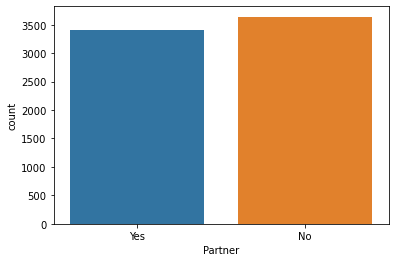

In [46]:
sns.countplot(df_cat['Partner'])
print(df_cat['Partner'].value_counts())

so there are 3402 married customers and 3641 unmarried customers

Yes    6361
No      682
Name: PhoneService, dtype: int64


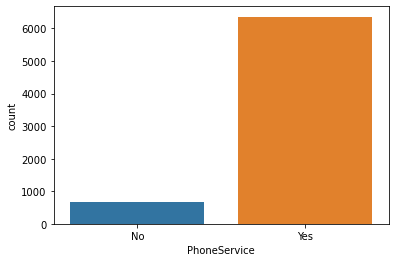

In [47]:
sns.countplot(df_cat['PhoneService'])
print(df['PhoneService'].value_counts())

6361 customers have phone service and 682 customers does not have phone service

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


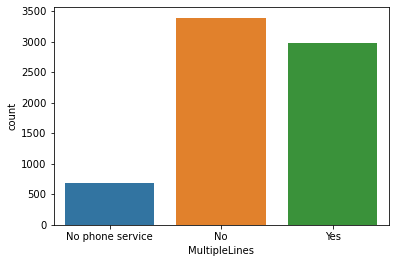

In [48]:
sns.countplot(df_cat['MultipleLines'])
print(df_cat['MultipleLines'].value_counts())

From this, we can observe that 682 customers does not have phone service,3390 customers are not using multiple lines and 2971 customers are using multiplelines.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


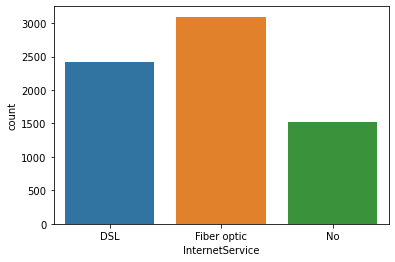

In [49]:
ax=sns.countplot(df_cat['InternetService'])
print(df_cat['InternetService'].value_counts())

3096 customers are using Fiber optic, 2421 customers are using DSL and 1526 customers does not have internet service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


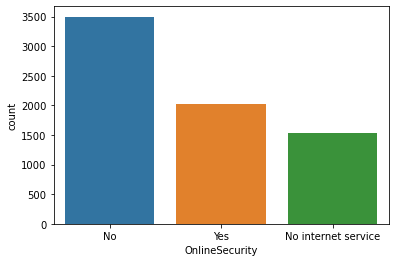

In [50]:
sns.countplot(df_cat['OnlineSecurity'])
print(df_cat['OnlineSecurity'].value_counts())

2019 customers have online security, 3498 customers does not have online security, 
1526 customers does not have internet service

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


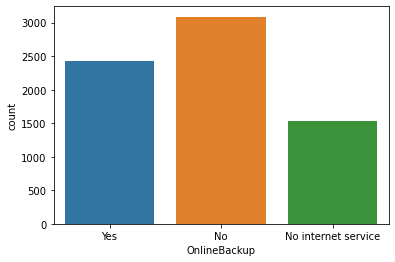

In [51]:
sns.countplot(df_cat['OnlineBackup'])
print(df_cat['OnlineBackup'].value_counts())

3088 customers does not have Online backup, 2429 customers have online backup and 1526 customers 
does not have internet service

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


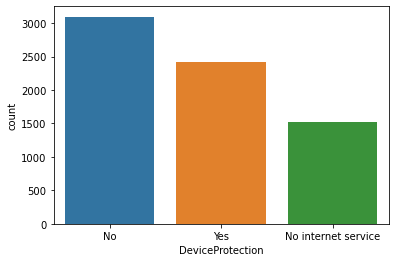

In [52]:
sns.countplot(df_cat['DeviceProtection'])
print(df_cat['DeviceProtection'].value_counts())

3095 customers does not have device protection, 2422 customers have device protection and 
1526 customers does not have internet service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


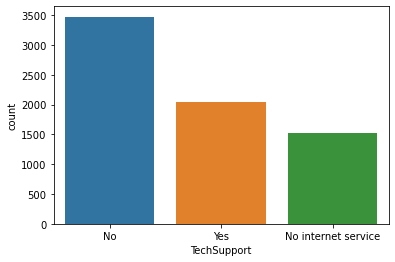

In [53]:
sns.countplot(df_cat['TechSupport'])
print(df_cat['TechSupport'].value_counts())

3473 customers does not have tech support, 2044 customers have tech support and 1526 customers does not have tech support

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


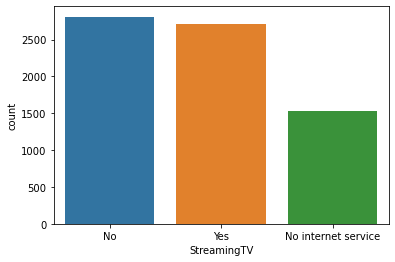

In [54]:
sns.countplot(df_cat['StreamingTV'])
print(df_cat['StreamingTV'].value_counts())

2707 customers have Streaming TV, 2810 customers does not have streaming tv, 1526 customers does not have internet service

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


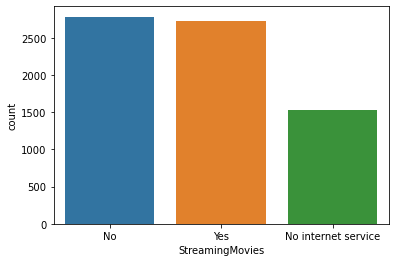

In [55]:
ax=sns.countplot(df_cat['StreamingMovies'])
print(df_cat['StreamingMovies'].value_counts())

2785 customers does not have streaming movies, 2732 customers have streaming movies and 1526 customers have internet services.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


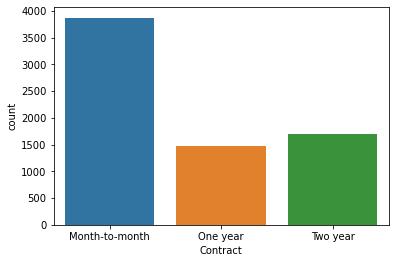

In [56]:
ax=sns.countplot(df_cat['Contract'])
print(df_cat['Contract'].value_counts())

3875 customers have month-to-month contract, 1695 customers have 2 years contract, 1473 customers have one year contract

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


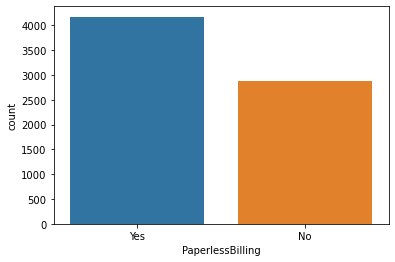

In [57]:
ax=sns.countplot(df_cat['PaperlessBilling'])
print(df_cat['PaperlessBilling'].value_counts())

4171 customers have PaperlessBilling and 2872 customers does not have PaperlessBilling

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


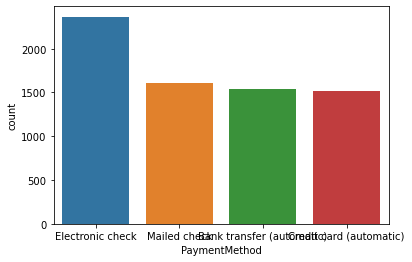

In [58]:
ax=sns.countplot(df_cat['PaymentMethod'])
print(df_cat['PaymentMethod'].value_counts())

2365 customers did the payment through electronic check, 1612 customers did the payment through Mailed check, 1544 customers did
the payment through Bank transfer, 1522 customers did the payment through Credit card

No     5174
Yes    1869
Name: Churn, dtype: int64


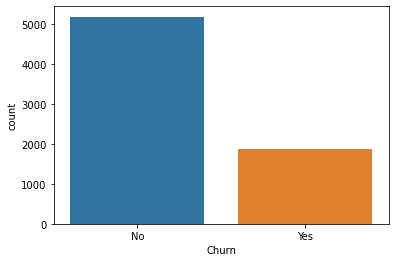

In [59]:
ax=sns.countplot(df_cat['Churn'])
print(df_cat['Churn'].value_counts())

5174 customers with no churn and 1869 customers with yes churn

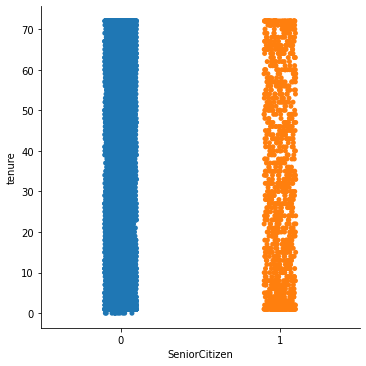

In [60]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df)
plt.show()

# Data Distribution for numeric column

In [61]:
df_numeric=df[['MonthlyCharges','TotalCharges']].copy()

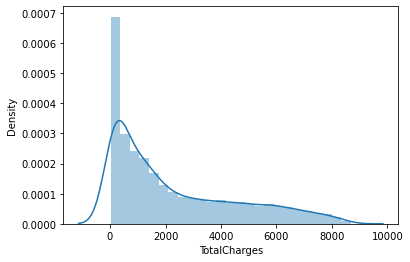

In [62]:
sns.distplot(df_numeric['TotalCharges'],kde=True)
plt.show()

Total Charges value has a peak and then gradually its decreasing

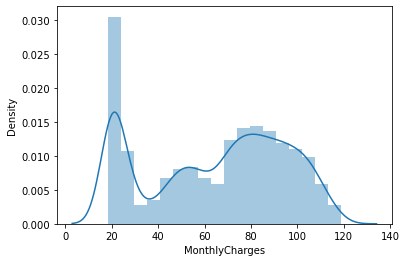

In [63]:
sns.distplot(df['MonthlyCharges'],kde=True)
plt.show()

There are jumps in the dataset

Since the dataset has lot of String values, we will use encoding techniques

# Encoding of DataFrame

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
oe=OrdinalEncoder()

In [66]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [67]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [68]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# checking the correlation

In [69]:
dfcorr=df.corr()

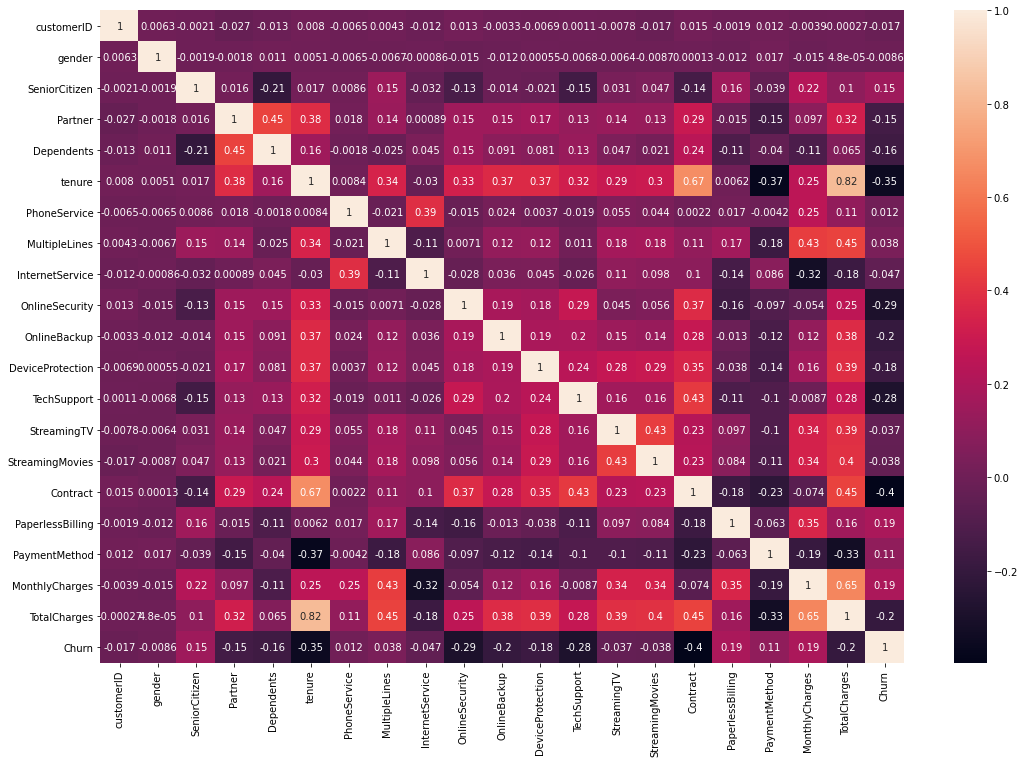

In [70]:
plt.figure(figsize=[18,12])
sns.heatmap(dfcorr,annot=True)
plt.show()

#Observation
- CustomerID is not correlated to any variables.
- Gender is not correlated to any variables.
- SeniorCitizen is slightly correlated with MonthlyCharges, PaperlessBilling,Churn.
- Partner is slightly correlated with TotalCharges, Contract,Dependents, Tenure.
- Tenure is highly correlated with TotalCharges, Contract and slightly correlated with Monthly charges,
  StreamingMovies,StreamingTV,TechSUpport,DeviceProtection,Online backup,Online security,Multiplelines,
  Partner.
- Dependent is correlated with Partner.
- Phone Service is correlated with Internet service.


# Checking the correlation with Target Variable

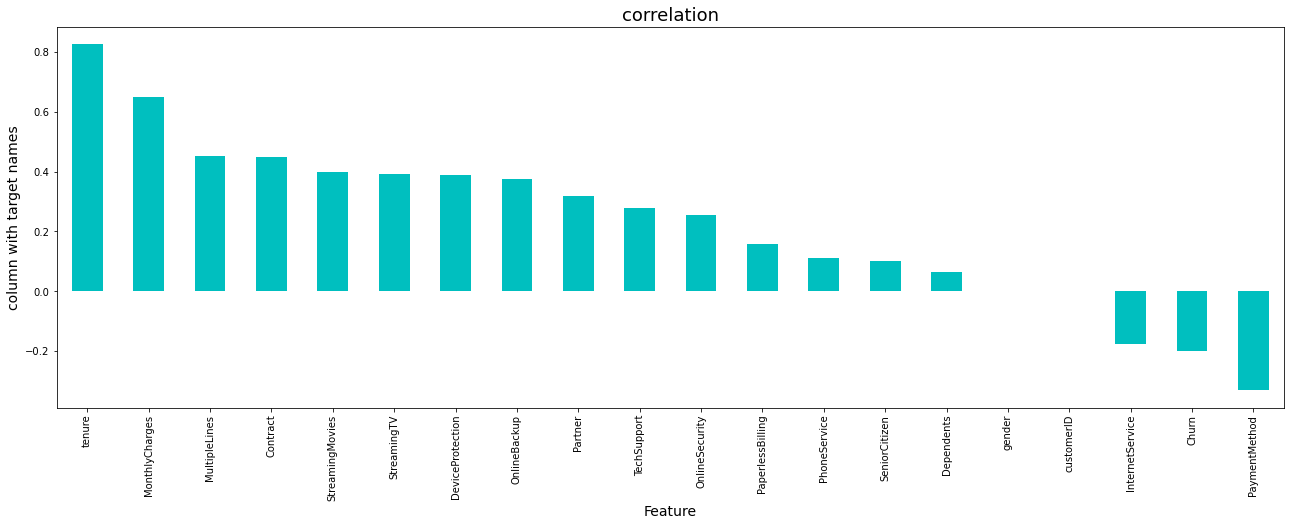

In [71]:
plt.figure(figsize=[22,7])
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Tenure has the highest correlation, then Monthly charges is correlated and so on

# Checking the skewness

In [72]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Now there are few cateogrical variables
- SeniorCitizen-Categorical
- Dependents-Categorical
- PhoneService - Categorical
- TotalCharges- Target Variables
- Churn - Categorical
Hence, we dont have to deal with skewness

# Checking the Outliers

In [73]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [74]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

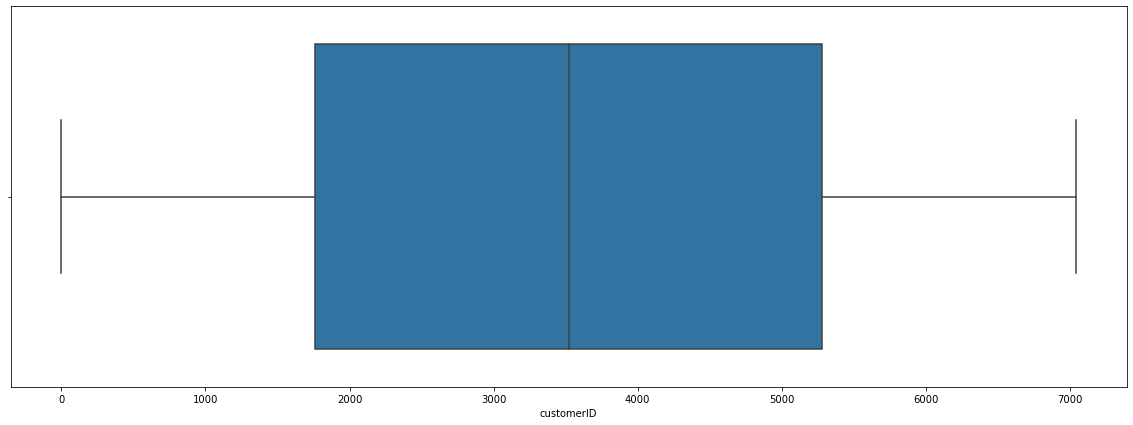

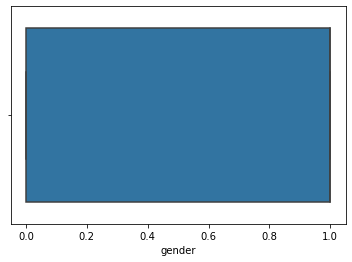

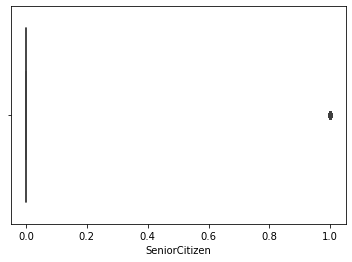

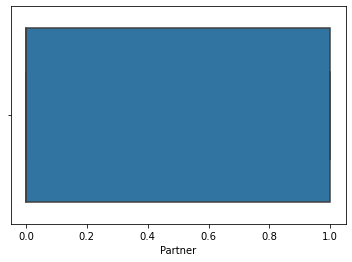

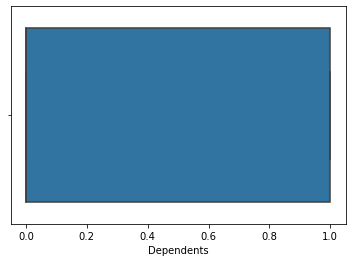

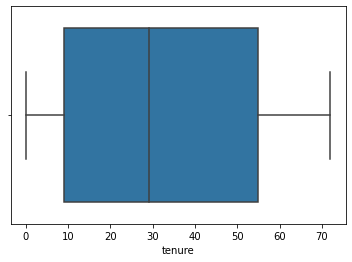

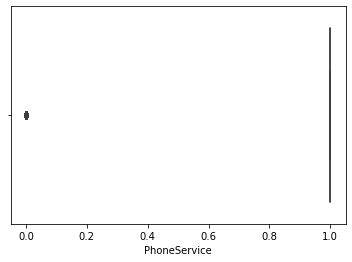

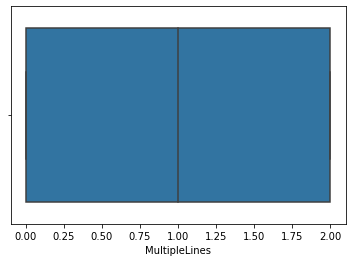

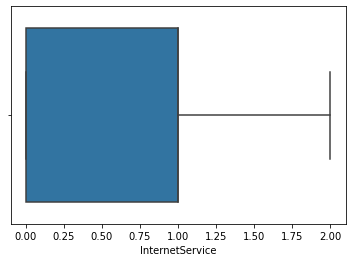

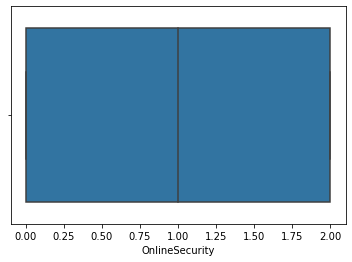

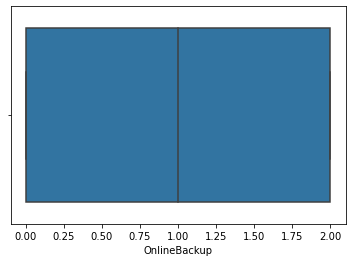

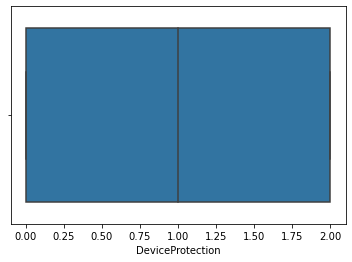

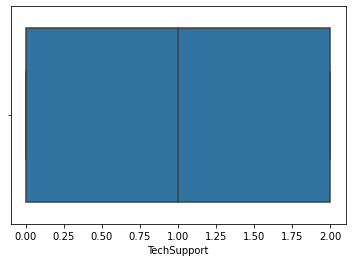

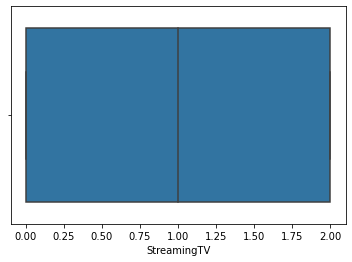

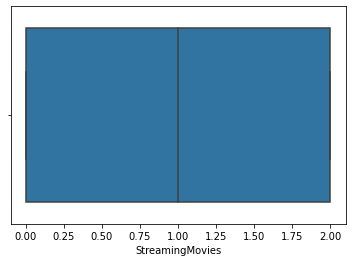

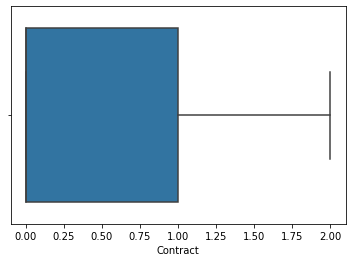

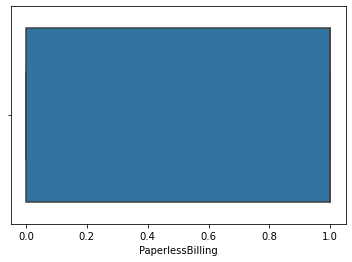

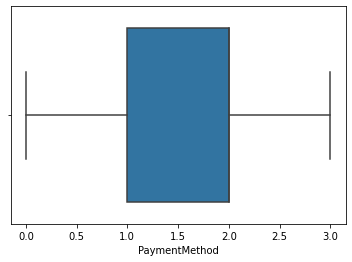

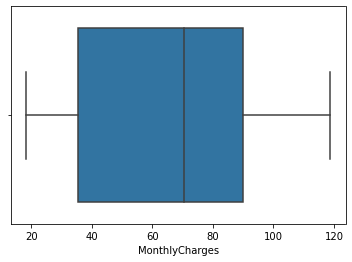

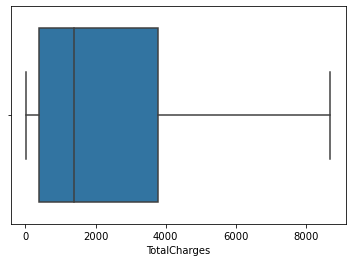

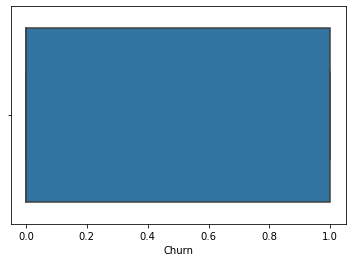

In [75]:
columns= plt.figure(figsize=[20,7])
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

We can observe that there are outliers in senior citizens but since the data is categorical type, we cannot consider it as outlier

# Splitting the dataset

In [76]:
x=df.drop('TotalCharges',axis=1)
y=df['TotalCharges']

# Scaling the data using Min-Max Scaler

In [77]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_x=mms.fit_transform(x)

In [78]:
df_x = pd.DataFrame(df_x,columns=x.columns)

In [79]:
x=df_x

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [81]:
import warnings
warnings.filterwarnings('ignore')

# Finding the best random state

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [83]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)

Best accuracy is 0.9127064363318586 for random state 46


In [84]:
lm=LinearRegression()
dtc=DecisionTreeRegressor()
rf=RandomForestRegressor()

model =[lm,dtc,rf]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=46)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('R2 score for',i, 'is',r2_score(pred,y_test))
    score=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i, 'is',score.mean())
    print('Difference between R2 score and Cross Validation Score is',r2_score(pred,y_test) - score.mean())
    print('\t')
    print('\t')

R2 score for LinearRegression() is 0.9015883416101589
Cross validation score for LinearRegression() is 0.9036665825623265
Difference between R2 score and Cross Validation Score is -0.002078240952167576
	
	
R2 score for DecisionTreeRegressor() is 0.9971206566346079
Cross validation score for DecisionTreeRegressor() is 0.9972032885360947
Difference between R2 score and Cross Validation Score is -8.26319014868293e-05
	
	
R2 score for RandomForestRegressor() is 0.9986939182739496
Cross validation score for RandomForestRegressor() is 0.9987376710919523
Difference between R2 score and Cross Validation Score is -4.375281800272912e-05
	
	


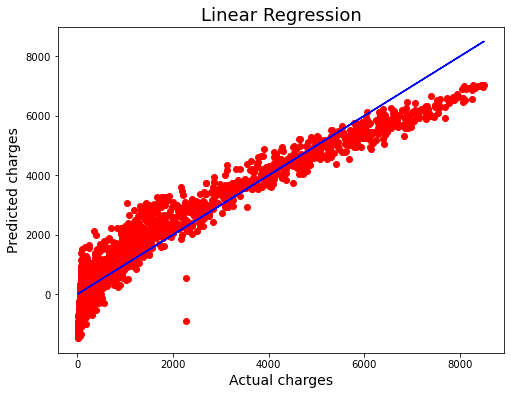

In [95]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=lm.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

Best fit line is covering most of the data points which shows good fit of our model

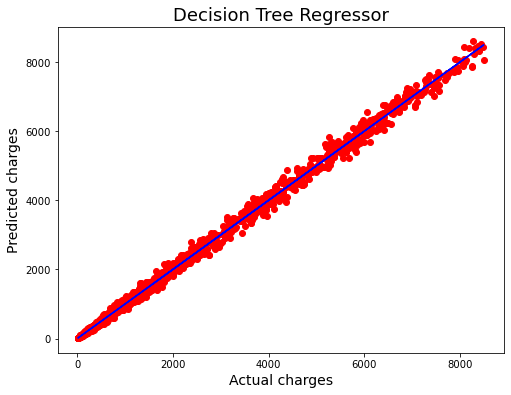

In [94]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=dtc.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Decision Tree Regressor', fontsize=18)
plt.show()

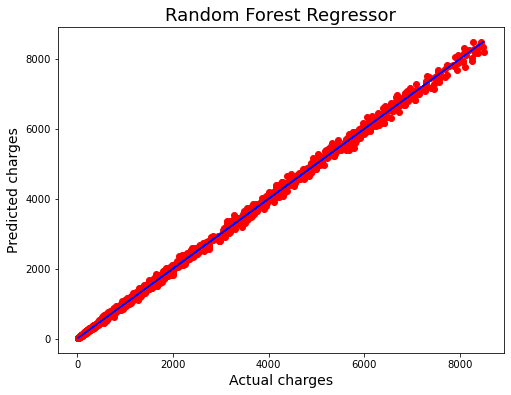

In [93]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=rf.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Random Forest Regressor', fontsize=18)
plt.show()

# Regularization

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [83]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [84]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9053051641143706

In [85]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9036474785620348

# Hyper Parameter tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [88]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [89]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [90]:
rfr = RandomForestRegressor(random_state=46, max_features='auto', n_estimators= 200, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))

0.9985731731619106


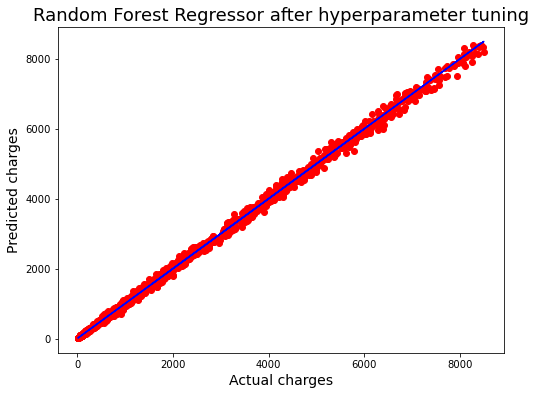

In [92]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=rfr.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Random Forest Regressor after hyperparameter tuning', fontsize=18)
plt.show()

# Saving the model

In [96]:
import pickle
filename='churn.pkl'
pickle.dump(rfr,open(filename,'wb'))

# Conclusion:

In [97]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9985731731619106


In [99]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predrfr[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
Predicted,1579.333306,7249.944938,1132.24906,155.41562,3706.084463,3601.781117,893.917512,23.354393,260.720922,81.7519,...,780.040735,5673.867952,23.354393,904.424441,4565.018049,72.264701,72.264701,2561.283701,535.645088,6008.125926
Original,1579.333306,7249.944938,1132.24906,155.41562,3706.084463,3601.781117,893.917512,23.354393,260.720922,81.7519,...,780.040735,5673.867952,23.354393,904.424441,4565.018049,72.264701,72.264701,2561.283701,535.645088,6008.125926
